1. To begin we need to import the necessary modules for this tutorial.
- NumPy: provides a variety of mathematical functions
- SciPy: more complex functions that builds on NumPy's capabilites
- Matplotlib: a data visualisation library that integrates well with Jupyter Notebooks
- Scikit-learn: provides supervised and unsupervised learning algorithms which can be used for a multitude of AI/ML purposes such as regression, classification, clustering, etc.

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

2. The first example of this tutorial will be to show how using these modules we can solve a curve fitting regression problem. 
- We will generate a dataset and then try to fit a function to the data.

To start with a deterministic nonlinear function for the model is defined

In [63]:
def func(x):
    return np.exp(3*x) + 2*np.exp(-2*x)

The values along the curve are then generated using NumPy and the declared function

In [64]:
x_train = np.linspace(0., 2, 200)
y_train = func(x_train)

Now we generate data points and use the function _func_ and add Gaussian noise to the dataset


In [67]:
x = np.array([.0, .1, .2, .4, .6, .8, 1])
y = func(x) + 2 * np.random.randn(len(x))

Now we plot the data points

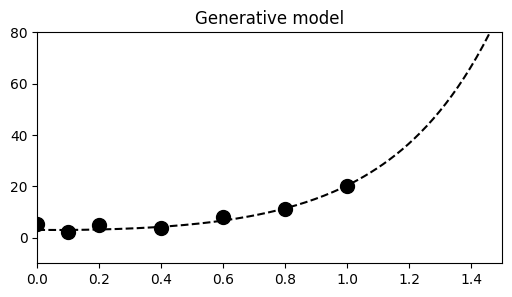

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')
plt.show()

Now that we have the generative model established we can use the capabilites of scikit-learn to fit a linear model to the data in three steps:
1. Create the model using Linear Regression
2. Fit the model to the dataset
3. Use the model to predict values

In [69]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_lr = lr.predict(x_train[:, np.newaxis])

We now plot this on the graph we produced previously

Text(0.5, 1.0, 'Linear regression')

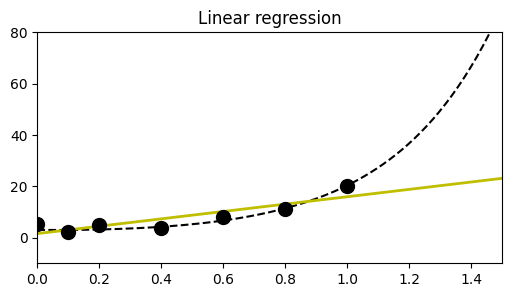

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x_train, y_lr, 'y', lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Linear regression')

The model we have just produced however is not well adapted to the dataset as it is a linear fit whereas the data points generated were produced using a nonlinear model which results in an exponential curve. Therefore for this data a nonlinear model is more appropriate. We can achieve this by still using linear regression but we have to use the *NumPy* function *np.vander()* which allows us to create a Vandermonde matrix. With this matrix we can then fit a polynomial to the data. The degree of the polynomial is the number of columns in the matrix. The following code shows how to do this and provides the visualtion of the fit for a range of polynomial degrees.

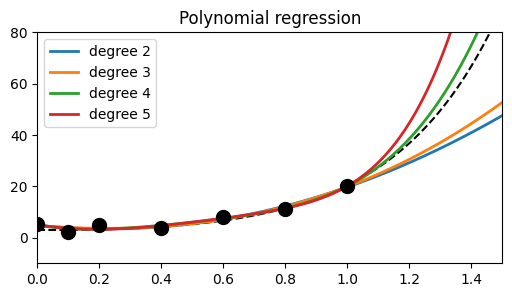

In [100]:
lrpoly = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
for deg in [2, 3, 4, 5]:
    lrpoly.fit(np.vander(x, deg+1), y)
    y_lrpoly = lrpoly.predict(np.vander(x_train, deg+1))
    ax.plot(x_train, y_lrpoly, label='degree {}'.format(deg), lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Polynomial regression')
ax.legend(loc=2)